In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import numpy as np
import scipy as sp
import datetime

In [7]:
description = pd.read_csv('cluster_new.txt',names=['number', 'desc'])


In [8]:
#File path of all the files
test_filepath = "./test/*.occ"
train_filepath = "./train/*.occ"

#Creating a sample dataset adding both column time and data in it
kth_dataset = pd.read_csv('./train/01.occ', sep=' ', names = ['time', 'data'])
kth_test_dataset = pd.read_csv('./test/01.occ', sep=' ', names = ['time', 'data'])

#Dropping data column since it will re read again
kth_dataset = kth_dataset.drop('data', axis=1)
kth_test_dataset = kth_test_dataset.drop('data', axis=1)

#glob returns all the data, sorted sorts it, then read csv read each file 
for count, filename in enumerate(sorted(glob.glob(test_filepath))):
    data = pd.read_csv(filename, sep = ' ', names = ['time', 'data'])
    if any(description.number == count+1):
        ddd = description['desc'][description['number'] == count+1 ].first_valid_index()
        kth_test_dataset[ description.ix[ddd]['desc'] ] = data['data']
    else:
        kth_test_dataset[str(count+1)] = data['data']
    
kth_test_dataset['time'] = pd.to_datetime(kth_test_dataset['time'],unit='s')

kth_test_dataset = kth_test_dataset.set_index('time')

print (kth_test_dataset.shape)

for count, filename in enumerate(sorted(glob.glob(train_filepath))):
    data = pd.read_csv(filename, sep = ' ', names = ['time', 'data'])
    if any(description.number == count+1):
        ddd = description['desc'][description['number'] == count+1 ].first_valid_index()
        kth_dataset[ description.ix[ddd]['desc'] ] = data['data']
    else:
        kth_dataset[str(count+1)] = data['data']
    
kth_dataset['time'] = pd.to_datetime(kth_dataset['time'],unit='s')

kth_dataset = kth_dataset.set_index('time')
kth_dataset['sep_hour']  = kth_dataset.index.hour
kth_test_dataset['sep_hour'] = kth_test_dataset.index.hour

(27, 37)


In [4]:
kth_dataset.head()

,Nils chair,Johan chair,Yuquan chair,Yuquan laptop,Nils Backpack,trash can,Yuquan bag,Yuquan lamp,Yuquan water bottle,A bag on Johan's desk,...,calibration board,Nils bike helmet,Johan laptop,Nils cup,Johan jacket,box !!!,2nd backpack,couch,TV,sep_hour
time,,,,,,,,,,,,,,,,,,,,,
2014-08-20 13:17:46,1,1,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,13
2014-08-20 15:04:53,1,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2014-08-28 15:19:34,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2014-08-28 16:16:04,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
2014-08-28 17:16:25,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17


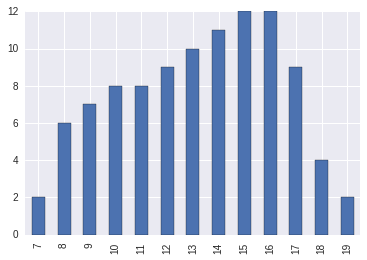

In [4]:
%matplotlib inline
plt.figure()
kth_dataset.sep_hour.value_counts().sort_index().plot(kind='bar')

In [4]:
kth_dataset.drop('sep_hour', axis=1).sum().plot(kind='bar')
plt.show()

zxc =  kth_dataset.drop('sep_hour', axis=1).sum() 
yyy = (zxc > 90 ) ^ (zxc < 10)  
#yyy = (zxc < 10)  
#list_to_learn = yyy[yyy == True].index.tolist()
list_to_learn = yyy.index.tolist()
list_to_learn[:10]
#kth_dataset.drop('sep_hour', axis=1).sum() > 10

['Nils chair',
 'Johan chair',
 'Yuquan chair',
 'Yuquan laptop',
 'Nils Backpack',
 'trash can',
 'Yuquan bag',
 'Yuquan lamp',
 'Yuquan water bottle',
 "A bag on Johan's desk "]

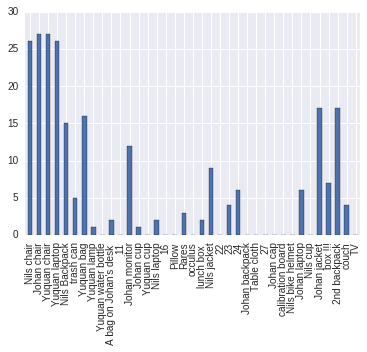

In [254]:
kth_test_dataset.drop('sep_hour', axis=1).sum().plot(kind='bar')
plt.show()
kth_test_dataset.to

In [43]:
%matplotlib
kth_dataset[['11','12']]
sns.heatmap(kth_dataset[['11', '12']].T)
plt.xticks(rotation=-90) 
plt.show()

Using matplotlib backend: Qt4Agg


In [75]:
import matplotlib.dates as mdates

sns.heatmap(kth_dataset['2014-09-21 16:32:03':'2014-09-24 16:14:16'])
plt.yticks(rotation=0) 
plt.show()

AttributeError: 'module' object has no attribute 'yaxis'

In [33]:
%matplotlib
import matplotlib.dates as mdates

# build the figure
fig, ax = plt.subplots()
sns.heatmap(kth_dataset.T, ax=ax)

# assign locator and formatter for the xaxis ticks.
#ax.yaxis.set_major_locator(mdates.AutoDateLocator())
#ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
plt.yticks(rotation=0)
plt.xticks(rotation=-90)
plt.show()

Using matplotlib backend: Qt4Agg


# Beta-Bernouli Model


 ~ Bernoulli(p)
  p = 
[ 0.2  0.9]

(10,)
Iteration 1: loglike=-9.397108e+00 (0.002 seconds)
 ~ Beta(a, b)
  a = 
[  1.00100000e+00   1.00000000e-03]
  b = 
[ 3.001  6.001]



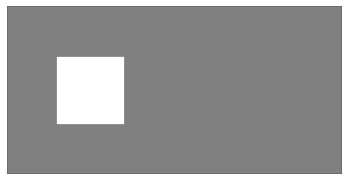

In [118]:
from bayespy.nodes import Beta

n_objects = 1
n_timezones = 24
n_observations = 1

from bayespy.nodes import Bernoulli, Beta, Mixture, Categorical
from bayespy.utils import random

index = Categorical(np.ones(2)/2, plates=(10,)).random()
p0 = np.array([0.6, 0.3])
print (prob)
observe_data = random.bernoulli(p0[index])
p = Beta([1e-3, 1e-3], plates=(2,))
z = Mixture(index, Bernoulli, p)
#z = Bernoulli(p, plates=(10,2))
print (z.plates)

#observe_data = np.array([[0,1],[0,1],[0,1],[1,1],[1,1],
#                [0,0], [0,0], [0,0], [0,0], [0,0]])
z.observe(observe_data)

from bayespy.inference import VB
Q = VB(z, p)
Q.update()

print (p)
import bayespy.plot as bpplt
import numpy as np
bpplt.hinton(p)
#bpplt.pdf(p[0], np.linspace(0, 1, num=100))

In [5]:
import pymc3 as pm
from theano import shared
import datetime

learned_probabilities = pd.DataFrame()
now = datetime.datetime.now()
print ('start : ', str(now))
#for object_name in kth_dataset.drop('sep_hour', axis=1):
for object_name in list_to_learn[25:]: 
    with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
        # Define random variables
        grp_mean = pm.Beta('grp mean', alpha=2, beta=2) # prior
        grp_scale = pm.Gamma('grp scale', alpha=1, beta=10./10**2) # prior

        # Transform
        alpha = grp_mean * grp_scale
        beta = (1 - grp_mean) * grp_scale

        # Individual random variables, vector of lenght 20
        theta = pm.Beta('theta', alpha=alpha, beta=beta, shape=24)

        # Define how data relates to unknown causes
        data = pm.Bernoulli('observed',
                            p=theta[kth_dataset['sep_hour']],
                            observed=kth_dataset[object_name])

        # Inference!
        start = pm.find_MAP() # Find good starting point
        step = pm.NUTS (scaling=start) # Instantiate MCMC sampling algorithm
        trace = pm.sample(100, step, start=start, progressbar=False)[:20] # draw posterior samples using slice sampling
    
    print (object_name, str(datetime.datetime.now()))
    print (np.mean(trace['theta'], axis=0))
    learned_probabilities[object_name] = np.mean(trace['theta'], axis=0)
    learned_probabilities.to_csv('./learned_probabilities_from25.csv')

start :  2016-07-28 09:34:12.586773
Applied logodds-transform to grp mean and added transformed grp mean_logodds to model.
Applied log-transform to grp scale and added transformed grp scale_log to model.
Applied logodds-transform to theta and added transformed theta_logodds to model.
Table cloth 2016-07-28 09:35:26.274307
[ 0.10143308  0.10518872  0.10866295  0.10911524  0.11147932  0.11704032
  0.12027148  0.10493025  0.09950387  0.10542149  0.10446879  0.1057911
  0.10038186  0.09981756  0.10781447  0.10156152  0.10180245  0.10619195
  0.11254859  0.11222403  0.10931945  0.11252654  0.10325944  0.10340256]
Applied logodds-transform to grp mean and added transformed grp mean_logodds to model.
Applied log-transform to grp scale and added transformed grp scale_log to model.
Applied logodds-transform to theta and added transformed theta_logodds to model.
27 2016-07-28 09:36:09.109986
[ 0.09043629  0.09182991  0.0798827   0.08151375  0.08251725  0.0845087
  0.08372675  0.08290433  0.07883

In [7]:
import pymc3 as pm
learned_probabilities = pd.DataFrame()
now = datetime.datetime.now()
print ('start : ', str(now))
#for object_name in kth_dataset.drop('sep_hour', axis=1):
for object_name in list_to_learn[25:]: 
    with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
        # Define random variables
        grp_mean = pm.Beta('grp mean', alpha=2, beta=2) # prior
        grp_scale = pm.Gamma('grp scale', alpha=1, beta=10./10**2) # prior

        # Transform
        alpha = grp_mean * grp_scale
        beta = (1 - grp_mean) * grp_scale

        # Individual random variables, vector of lenght 20
        theta = pm.Beta('theta', alpha=alpha, beta=beta, shape=24)

        # Define how data relates to unknown causes
        data = pm.Bernoulli('observed',
                            p=theta[kth_dataset['sep_hour']],
                            observed=kth_dataset[object_name])

        # Inference!
        start = pm.find_MAP() # Find good starting point
        step = pm.NUTS (scaling=start) # Instantiate MCMC sampling algorithm
        trace = pm.sample(1000, step, start=start, progressbar=False)[:200] # draw posterior samples using slice sampling
    
    print (object_name, str(datetime.datetime.now()))
    print (np.mean(trace['theta'], axis=0))
    learned_probabilities[object_name] = np.mean(trace['theta'], axis=0)
    learned_probabilities.to_csv('./learned_probabilities_1000_from25.csv')

start :  2016-07-27 23:29:10.618094
Applied logodds-transform to grp mean and added transformed grp mean_logodds to model.
Applied log-transform to grp scale and added transformed grp scale_log to model.
Applied logodds-transform to theta and added transformed theta_logodds to model.
Nils chair 2016-07-27 23:30:03.438074
[ 0.93966496  0.93798359  0.93479042  0.94156171  0.93859001  0.93860486
  0.9392956   0.94393973  0.94730999  0.94752204  0.94817441  0.9504356
  0.94869154  0.95219734  0.94923294  0.92805755  0.95108892  0.94808929
  0.94498545  0.94069789  0.94152508  0.93505968  0.93866857  0.94116476]
Applied logodds-transform to grp mean and added transformed grp mean_logodds to model.
Applied log-transform to grp scale and added transformed grp scale_log to model.
Applied logodds-transform to theta and added transformed theta_logodds to model.
Johan chair 2016-07-27 23:30:37.468990
[ 0.95310728  0.95473553  0.95204452  0.95270151  0.95479633  0.95477537
  0.95651758  0.95517668

In [303]:
learned_probabilities['trash can']
kth_dataset['trash can'].sum()

56

In [12]:
learned_probabilities = pd.read_csv('./learned_probabilities_1000.csv')
names = learned_probabilities.columns.tolist()
names[10] = 'bag' names

['Unnamed: 0',
 'Nils chair',
 'Johan chair',
 'Yuquan chair',
 'Yuquan laptop',
 'Nils Backpack',
 'trash can',
 'Yuquan bag',
 'Yuquan lamp',
 'Yuquan water bottle',
 'bag',
 '11',
 'Johan monitor',
 'Johan cup',
 'Yuquan cup',
 'Nils laptop',
 '16',
 'Pillow',
 'Rares',
 'occulus',
 'lunch box ',
 'Nils jacket',
 '22',
 '23',
 '24',
 'Johan backpack',
 'Table cloth',
 '27',
 'Johan cap',
 'calibration board',
 'Nils bike helmet',
 'Johan laptop',
 'Nils cup',
 'Johan jacket',
 'box !!!',
 '2nd backpack',
 'couch',
 'TV']

In [9]:

n_observations = kth_test_dataset.shape[0]

all_evaluation = []
for i in np.arange(10):
    evaluation = {}
    for object_name in kth_test_dataset.drop('sep_hour', axis=1):
        count = 0
        for index in kth_test_dataset[object_name].index:
            expected_output = kth_test_dataset[object_name][index]
            test_output = sp.stats.bernoulli(learned_probabilities[object_name][index.hour]).rvs(1)
            if int(expected_output) == int(test_output[0]):
                #print (" E : ", expected_output, " T : ", test_output)
                count = count + 1

        evaluation[object_name] = np.round(count/n_observations, 4)
        
    all_evaluation.append(evaluation)

df = pd.DataFrame(all_evaluation)


In [14]:
%matplotlib qt
df.plot.box(ylim=(0,1), rot=90, 
            x_label = "Object name", 
            y_label = "Accuracy score",
            title = "Object location knowledge evalutation")

plt.show()

TypeError: boxplot() got an unexpected keyword argument 'x_label'

In [17]:
sns.heatmap(learned_probabilities.T)
plt.title('Posteriors')
plt.legend()
plt.show()


/home/deebuls/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
